## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
"""    In the whole notebook, I prefer to use .query than conventional filtering. I also
calculate proportions by manual division, since I found that much faster than .mean()"""

df.query('converted == 1').shape[0] / df.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
df.query('group == "treatment" and landing_page != "new_page"').shape[0] + df.query('group == "control" and landing_page != "old_page"').shape[0]

3893

f. Do any of the rows have missing values?

In [7]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
"""    This code first lists rows indices where treatment is not aligned with new_page 
and where control is not aligned with old_page. Then we combine them and convert to a set
to remove duplicates, then convert back to a list"""

remove_rows_index_1 = list(df.query('group == "treatment" and landing_page != "new_page"').index)
remove_rows_index_2 = list(df.query('group == "control" and landing_page != "old_page"').index)
remove_rows_index = list(set(remove_rows_index_1 + remove_rows_index_2))

In [9]:
df.drop(index = remove_rows_index, axis = 0, inplace=True)

In [10]:
df2 = df
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
df2[df2.duplicated('user_id')].user_id

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [14]:
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
# drop the first duplicated value since it has an older timestamp
df2.drop(labels=1899, axis=0, inplace=True)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
df2.query('converted == 1').shape[0] / df2.shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
df2.query('converted == 1 and group == "control"').shape[0] / df2.query('group == "control"').shape[0]

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
df2.query('converted == 1 and group == "treatment"').shape[0] / df2.query('group == "treatment"').shape[0]

0.11880806551510564

d. What is the probability that an individual received the new page?

In [19]:
df2.query('landing_page == "new_page"').shape[0]/df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

### Answer

The data shows that during the experiment, **11.96% of users converted regardless of the page** they received. The **conversion rate** was slightly **higher** among those received the **old page** with a rate of **12.04%** compared to **11.88%** for **new page** users. 

Since users had an almost **equal chance for receiving either pages** (0.01% higher for the new page), there is an indication that the **old page** actually leads to **more conversions**. 

However, the differences are narrow and do not provide a compelling evidence. **More investigation** is required using **A/B test** and **regression models**. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

### Answer
$$H_{0} : p_{new} - p_{old} \leq 0$$<br>
$$H_{1} : p_{new} - p_{old} > 0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [20]:
# this was calculated in part I
p_new = df2.query('converted == 1').shape[0] / df2.shape[0]
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [21]:
# under the null, we assume that p_old = p_new = conversion rate
p_old = df2.query('converted == 1').shape[0] / df2.shape[0]
p_old

0.11959708724499628

c. What is $n_{new}$?

In [22]:
# number of users who received the new page
# we can also query group == "treatment" since we wrangled the data earlier 
n_new = df2.query('landing_page == "new_page"').shape[0]
n_new

145310

d. What is $n_{old}$?

In [23]:
# number of users who received the old page
n_old = df2.query('landing_page == "old_page"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
# we can also use random.choice
new_page_converted = np.random.binomial(n=1, p=p_new, size=n_new)
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted = np.random.binomial(n=1, p=p_old, size=n_old)
old_page_converted

array([0, 0, 0, ..., 0, 1, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
# since len of theses arrays are different, I'll find the difference in means
p_diff = new_page_converted.mean() - old_page_converted.mean()
p_diff

0.00010801105585404869

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [27]:
"""    This idea was provided in a previous feedback, all credits goes to the reviewer.
This code runs an experiment of n_new number of trials with p_new probability of success, 
then repeats 10000 times, and divide by n_new to get the proportion of each experiment. Now 
we have our new_page_converted.mean(). The same goes for old_page_converted.mean(), and then 
we calculate the difference in p_diffs. This is much faster than a normal for loop."""

new_page_converted = np.random.binomial(n=n_new, p=p_new, size=10000)/n_new
old_page_converted = np.random.binomial(n=n_old, p=p_old, size=10000)/n_old
p_diffs = new_page_converted - old_page_converted

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

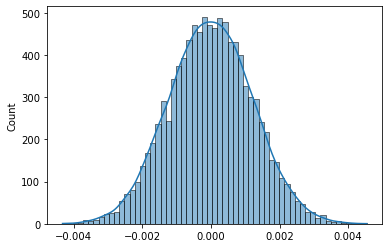

In [28]:
sns.histplot(data=p_diffs, kde=True);

### Answer

Because of the large number of iterations in the simulation, we expect that the **Central Limit Theorem** becomes effective, which will result in a normal shape for our sampling distribution. 

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
# these have been calculated before but with different query
obs_p_new = df2.query('landing_page == "new_page" and converted == 1').shape[0] / df2.query('landing_page == "new_page"').shape[0]
obs_p_old = df2.query('landing_page == "old_page" and converted == 1').shape[0] / df2.query('landing_page == "old_page"').shape[0]

# observed difference in conversion rate
obs_p_diff = obs_p_new - obs_p_old
obs_p_diff

-0.0015782389853555567

In [30]:
# proportion of the p_diffs that are greater than the observed difference
(p_diffs > obs_p_diff).mean()

0.9012

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

### Answer

The proportion we calculated in the above cell is the probability of getting a diff in our sampling distribution that is greater than the observed (actual) difference in the conversion rate.

This is called **p-value**, and is used to decide whether we can reject the null.

Since our sampling distribution was generated under the null (assuming that the new page is not effective or even worse), and that more than **90%** of the samples generated during the simulation had diff above the observed value, **we can't reject the null**, meaning that the **new page is ineffective or even worse in generating higher conversion rate**. 

The rule is that, with an alternative greater than, we reject the null if:
$$\mathbf{p_{value} < \alpha}$$
Where $\alpha$ is type I error rate.

And since in our test: $p_{value}=0.9012 > \alpha=0.05$, we can't reject the null.

We can see the p-value in the following cell as the area under the distribution curve right of the observed difference (in red).

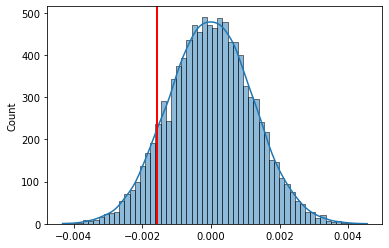

In [31]:
sns.histplot(data=p_diffs, kde=True);
plt.axvline(x=obs_p_diff, color='r', linewidth=2);

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [32]:
convert_old = df2.query('landing_page == "old_page" and converted == 1').shape[0]
convert_new = df2.query('landing_page == "new_page" and converted == 1').shape[0]
n_old = df2.query('landing_page == "old_page"').shape[0]
n_new = df2.query('landing_page == "new_page"').shape[0]

In [33]:
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [34]:
# statsmodels is already imported at the top of the notebook
sm.stats.proportions_ztest(count=[convert_old, convert_new], nobs=[n_old, n_new], value=None, alternative='smaller', prop_var=False)

(1.3109241984234394, 0.9050583127590245)

This means that:

z_score = 1.3109241984234394<br>
p-value = 0.9050583127590245

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

### Answer

The p-value obtained from this test is very close to what we calculated in the simulation. Hence, we come to the same conclusion that we can't reject the null.

We can also use the calculated z_score to get our decision, the rule is that, when the alternative is greater than, we reject the null if:
$$ \mathbf{Z_{cal}>Z_{\alpha}}$$

Where: $Z_{cal}$ is the calculated z_score.

Since at $\alpha = 0.05$, z_score = 1.69, we can't reject the null since:<br><br>
$$ Z_{cal}=1.31<Z_{\alpha=0.05}=1.69$$

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

### Answer

Since we are trying to predict a categorical response (conversion), the most popular technique for this is **logistic regression**.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [35]:
# creating an intercept
df2['intercept'] = 1

In [36]:
# creating ab_page column as a dummy variable
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

# let's look at the new dataframe
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [37]:
# statsmodels is already imported at the top of the notebook
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [38]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 16 Sep 2021   Pseudo R-squ.:               8.077e-06
Time:                        07:21:40   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

### Answer

**P-value** associated with ab_page is **0.190**, this means that there is no statistical significance for **ab_page** as an independent variable in the model since $\mathbf{p_{val}>\alpha}$. <br>
Hence, we conclude that there is no significant difference in conversion rate between the old page and the new page, which is the same result we found in the A/B test.

This p-value is different from the value found in previous A/B test since in the regression model, p-value is about whether the included variable (and its coefficient) has a significant effect on our response. This means that this p-value is of two-tailed test with the following assumptions:

$$H_{0} : \beta = 0$$<br>
$$H_{1} : \beta \neq 0$$

Where $\beta$ is the coefficient under test.

Regardless of the difference in p-value between our A/B test and the logistic regression, we predict to find similar results since there is an apparent gap between the p-value and $\alpha$.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

### Answer

As a general rule, adding additional variables to the regression model will improve the fit. This means that the model will have more explanatory power (more of the changes in the response can be attributed to the variables included in the model), usually this will show as a higher $R^2$.

This is not without its advantages though. Increasing the number of independent variables will increase the complexity of the model. It can also result in overfitting problem, which limits our ability in using the model in prediction. There are also more complex problems like autocorrelation and multicollinearity, which are common in econometrics.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [39]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [40]:
# finding country column values
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [41]:
# is there apparent difference in conversion rate? not clear
df_new.groupby(['country','ab_page'])['converted'].mean()

country  ab_page
CA       0          0.118783
         1          0.111902
UK       0          0.120022
         1          0.121171
US       0          0.120630
         1          0.118466
Name: converted, dtype: float64

In [42]:
### Create the necessary dummy variables
df_new[['UK', 'US', 'CA']]= pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US,CA
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [43]:
# now we can calculate the correlation between each country and the conversion rate
np.corrcoef(df_new['converted'], df_new['UK'])[0,1]

-0.0030218123852439336

In [44]:
np.corrcoef(df_new['converted'], df_new['US'])[0,1]

0.0017716953342117455

In [45]:
np.corrcoef(df_new['converted'], df_new['CA'])[0,1]

-0.00023713090475075446

No strong correlation between conversion rate and any of these countries.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [46]:
### Fit Your Linear Model And Obtain the Results
# will consider 'CA' as a baseline
log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'US']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 16 Sep 2021   Pseudo R-squ.:               2.323e-05
Time:                        07:21:43   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK            -0.0408      0.027     -1.516      0.130      -0.093       0.012
US             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

These results show that there is no statistical significance of the country variable as an explanatory variable of the conversion rate. P-values are higher that $\alpha=0.05$ for both countries.

Combined with what we found earlier that ab_page is not a significant explanatory variable, we conclude that our model has a very low explanatory power of the response. This is apparent in a very low $R^2$ (Pseudo $R^2$ since this is maximum likelihood estimation).

We can try to get the interaction model between page and country, this will allow us to investigate whether the new_page is successful in a specific country.

First, we need to create two additional columns, which represent the interaction between ab_page and the two countries.

In [47]:
df_new['UK_new'] = df_new['UK'] * df_new['ab_page']
df_new['US_new'] = df_new['US'] * df_new['ab_page']

In [48]:
# fit the interaction model
log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'US','UK_new','US_new']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Thu, 16 Sep 2021   Pseudo R-squ.:               3.482e-05
Time:                        07:21:46   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
UK            -0.0175      0.038     -0.465      0.642      -0.091       0.056
US            -0.0057      0.019     -0.306      0.760      -0.043       0.031
UK_new        -0.0469      0.054     -0.872      0.383      -0.152       0.059
US_new         0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

And our conclusion stays the same, none of the included explanatory variables has a statistical significance since p-value is higher than 0.05 for each of them. 

<a id='conclusions'></a>
## Conclusions

- A/B testing shows that we do not have enough evidence to conclude that the new page leads to more conversions.
- Regression approach found the same result.
- In addition, no evidence that users' countries affect the conversion rate.
- All the analysis would suggest that it is better to find another page design (or another variable), to increase conversion rate.

## Limitations

- This analysis did not include the influences associated with time on conversion.




Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.